# Analysing SMS Content to Detect Spam From Ham

## Load the important libraries and dataset

In [1]:
import pandas as pd
import nltk # Natural Language Toolkit library
import re # Regular Expression library
import string
# nltk.download() # to download the needed libraries

In [2]:
pd.set_option('display.max_colwidth', 100)

fullCorpus = pd.read_csv('fullCorpus_Clean_data.csv') 

fullCorpus.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"['ive', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this'...","['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '...","['ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant...","['ive', 'searching', 'right', 'word', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'g..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...","['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005'...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me...","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"['i', 'have', 'a', 'date', 'on', 'sunday', 'with', 'will']","['date', 'sunday']","['date', 'sunday']","['date', 'sunday']"


## Feature Engineering: Feature Creation

Feature creation can be represented by creating a new feature with the following:
* Length of text field.
* Percentage of characters that are punctuation in the text
* Percentage of Characters that are capitalized

#### Create feature for text message length

In [3]:
fullCorpus.head(3)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"['ive', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this'...","['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '...","['ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant...","['ive', 'searching', 'right', 'word', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'g..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...","['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005'...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']"


In [4]:
fullCorpus['body_length'] = fullCorpus['body_text'].apply(lambda x: len(x) - x.count(" "))

fullCorpus.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_length
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"['ive', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this'...","['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '...","['ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant...","['ive', 'searching', 'right', 'word', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'g...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...","['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005'...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...",128
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me...","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"['i', 'have', 'a', 'date', 'on', 'sunday', 'with', 'will']","['date', 'sunday']","['date', 'sunday']","['date', 'sunday']",28


#### Create feature for % of text that is punctuation

In [5]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

fullCorpus['punct%'] = fullCorpus['body_text'].apply(lambda x: count_punct(x))

fullCorpus.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_length,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"['ive', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this'...","['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '...","['ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant...","['ive', 'searching', 'right', 'word', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'g...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...","['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005'...","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me...","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']","['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"['i', 'have', 'a', 'date', 'on', 'sunday', 'with', 'will']","['date', 'sunday']","['date', 'sunday']","['date', 'sunday']",28,7.1


#### Evaluate created features using data visualization

In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

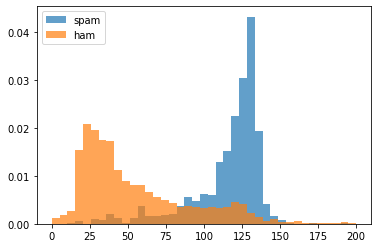

In [7]:
bins = np.linspace(0, 200, 40)

pyplot.hist(fullCorpus[fullCorpus['label'] == 'spam']['body_length'], bins, density = True, stacked = True, alpha = 0.7, label = 'spam')
pyplot.hist(fullCorpus[fullCorpus['label'] == 'ham']['body_length'], bins, density = True, stacked = True, alpha = 0.7, label = 'ham')
pyplot.legend(loc='upper left')
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

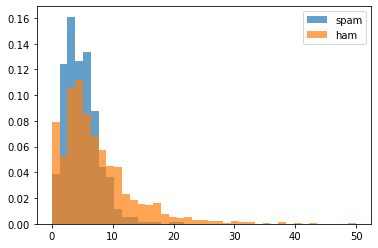

In [8]:
bins = np.linspace(0, 50, 40)

pyplot.hist(fullCorpus[fullCorpus['label'] == 'spam']['punct%'], bins, density = True, stacked = True, alpha = 0.7, label = 'spam')
pyplot.hist(fullCorpus[fullCorpus['label'] == 'ham']['punct%'], bins, density = True, stacked = True, alpha = 0.7, label = 'ham')
pyplot.legend(loc='upper right')
pyplot.show

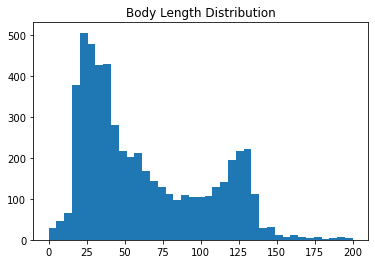

In [9]:
bins = np.linspace(0, 200, 40)

pyplot.hist(fullCorpus['body_length'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

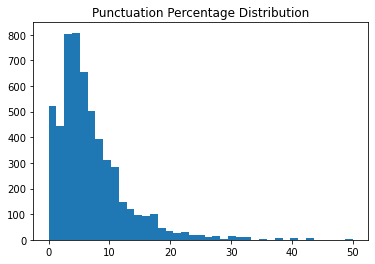

In [10]:
bins = np.linspace(0, 50, 40)

pyplot.hist(fullCorpus['punct%'], bins)
pyplot.title('Punctuation Percentage Distribution')
pyplot.show()

We can see from the above two figures that 'Punctuation Percentage Distribution' Figure has more skewness in the data distribution. Therefore, we will fix the skewness within this column.

#### Transform the punctuation % feature

#### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

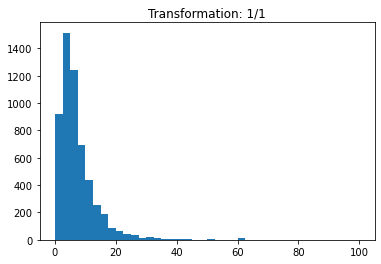

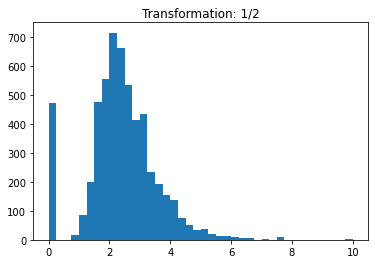

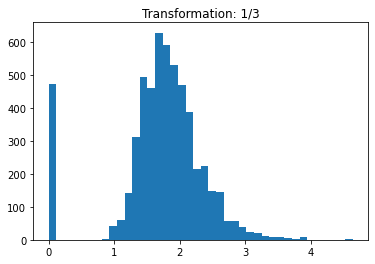

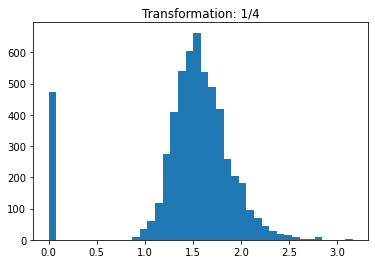

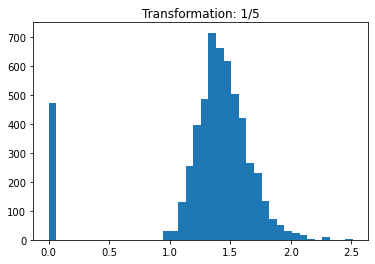

In [11]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((fullCorpus['punct%'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

We notic the change in each figure. After power transformation, the distribution is shifting toward the right to present normal distribution

### Write out Cleaned Data

In [12]:
fullCorpus.to_csv('fullCorpus_feature_engineering.csv', index=False, header=True)